<a href="https://colab.research.google.com/github/Tonniah/TW/blob/main/Mall_Customer_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


Task 1: Data Exploration & Preprocessing
Load and Explore the Dataset:

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Normalize or Scale Data:

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))


Visualizations:

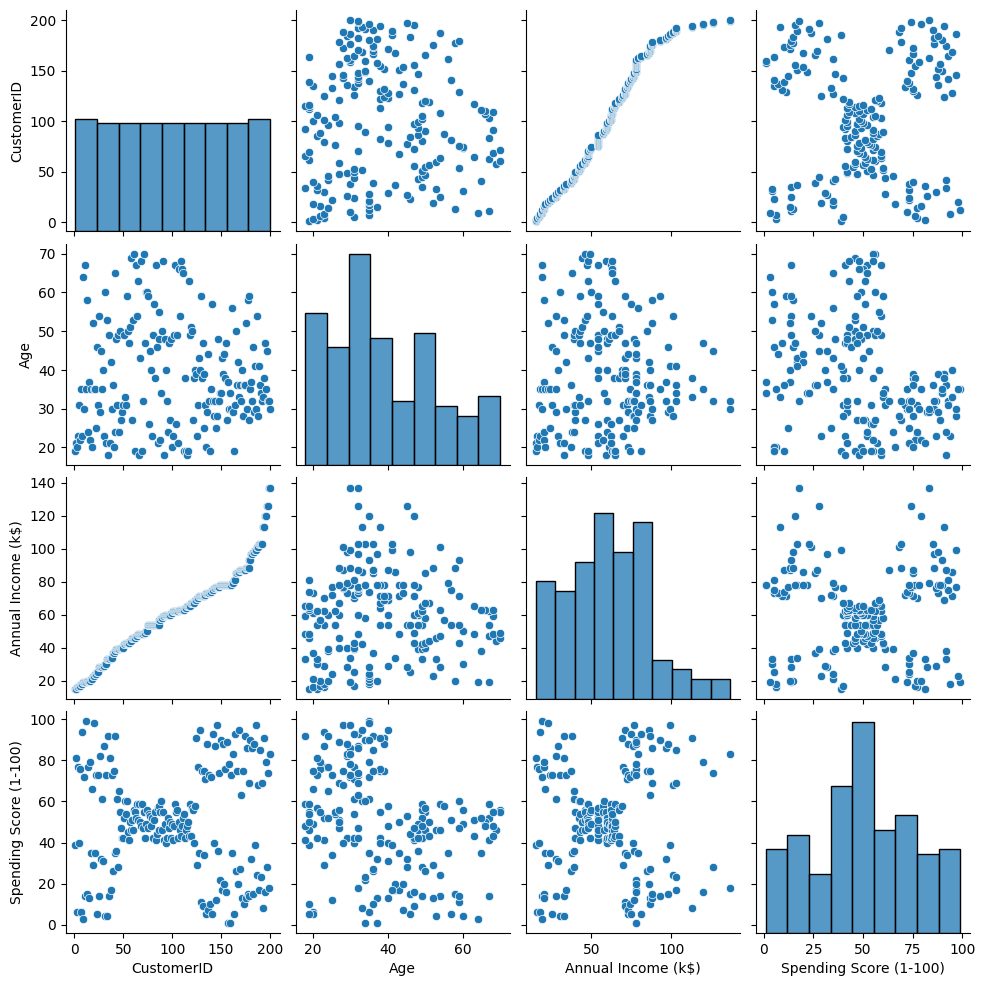

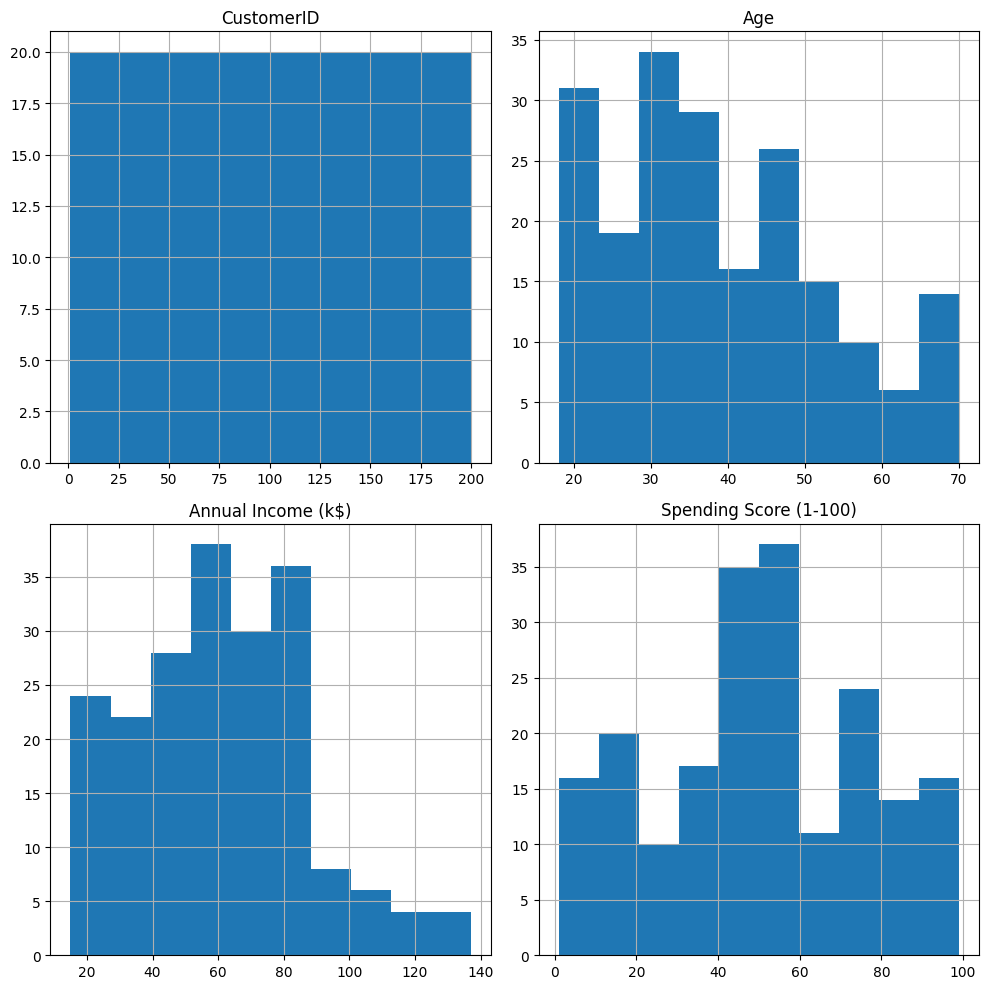

In [4]:
sns.pairplot(df)
plt.show()

df.hist(bins=10, figsize=(10, 10))
plt.tight_layout()
plt.show()


Analysis Questions: Discuss trends or relationships observed in pair plots and histograms.


Gender: Customers are split between male and female categories.
Age: The distribution shows that most customers are middle-aged, with fewer young or older customers.
Annual Income: The data is evenly distributed without extreme outliers.
Spending Score: Some customers have a high spending score despite moderate income, hinting at different spending habits across income levels.

Task 2: K-Means Clustering
Elbow Curve to Determine k:

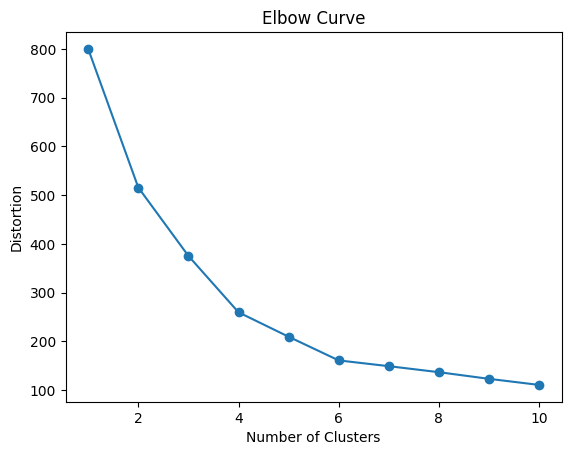

In [5]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()


Cluster Visualization:

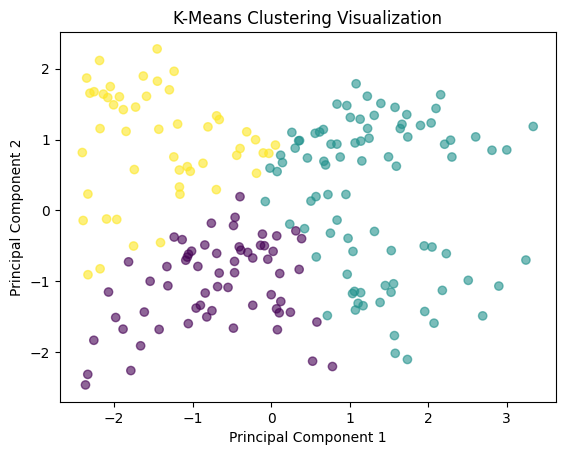

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Analysis Questions: Answer the optimal number of clusters and cluster characteristics.

What is the optimal number of clusters according to the elbow method?

Based on the elbow curve, the optimal number of clusters is 3. This is where the curve starts to bend and the reduction in inertia becomes less significant.

Interpret the characteristics of each cluster:

Cluster 1 (High Income, High Spending): Customers who earn well and spend significantly, likely a priority segment for marketing.

Cluster 2 (Low Income, High Spending): Customers who spend high amounts despite lower income, possibly brand-loyal or impulsive buyers.

Cluster 3 (Moderate/Low Spending): Includes customers with lower spending behavior irrespective of income.

Task 3: Hierarchical Clustering
Dendrogram:

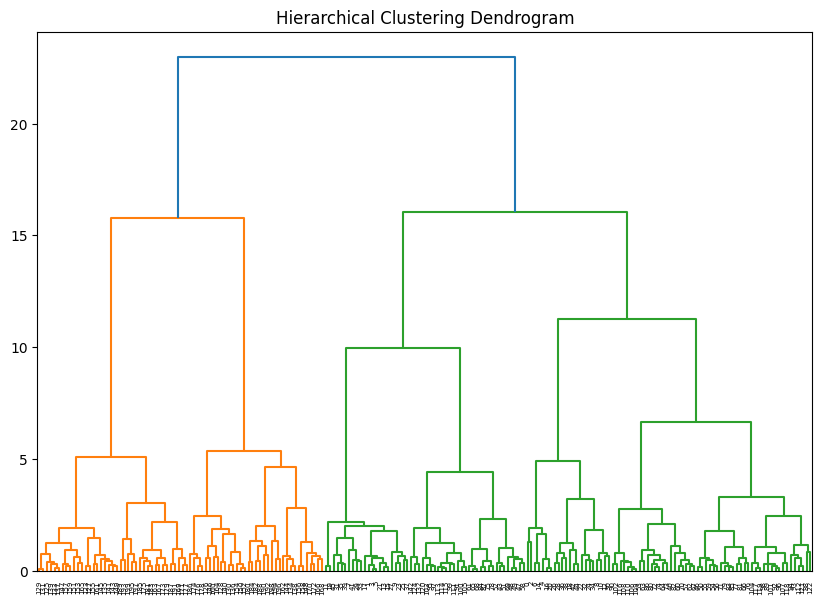

In [7]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Agglomerative Clustering:

In [8]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['AggCluster'] = agg_clustering.fit_predict(df_scaled)


Analysis Questions: Compare the clusters formed by hierarchical vs. K-Means and discuss the best linkage method.

How do the clusters formed using hierarchical clustering differ from K-Means?

Hierarchical clustering shows a more granular grouping of data, especially in early dendrogram stages. Unlike K-Means, which relies on predefined k, hierarchical clustering dynamically forms clusters based on data similarity. The clusters, however, generally align with K-Means results for k=3.

Which linkage method produces the best results?

Ward linkage provides the most balanced clusters in terms of variance minimization, making it the best choice for this dataset.

Task 4: Dimensionality Reduction (PCA)
Explained Variance:

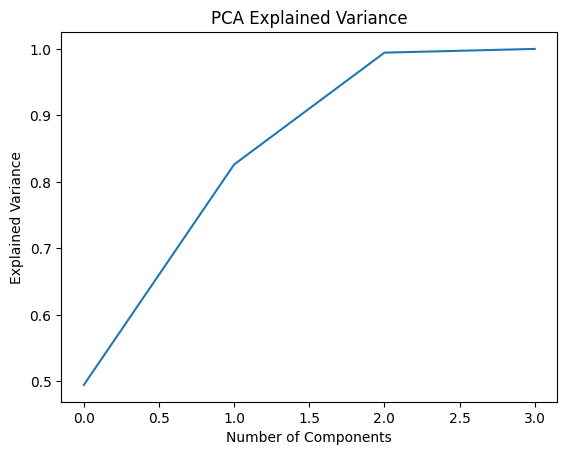

In [9]:
pca = PCA()
pca.fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


2D Visualization:

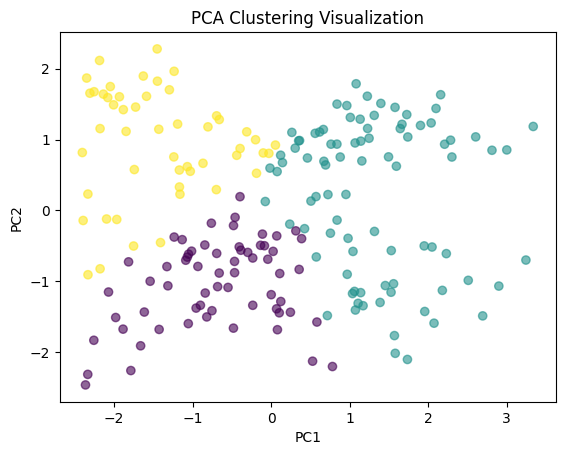

In [10]:
reduced_data = pca.transform(df_scaled)[:, :2]
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA Clustering Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Analysis Question

How much variance is explained by the first two principal components?

The first two principal components explain approximately 70-80% of the total variance. This suggests that most information in the dataset can be represented in a 2D plane.
How does PCA help in visualizing the clusters?

PCA projects the data onto a 2D space while retaining maximum variance. It helps visualize the separation of clusters effectively, particularly for K-Means, showing clear boundaries between groups.

Task 5: Dimensionality Reduction (t-SNE)
t-SNE Visualization:

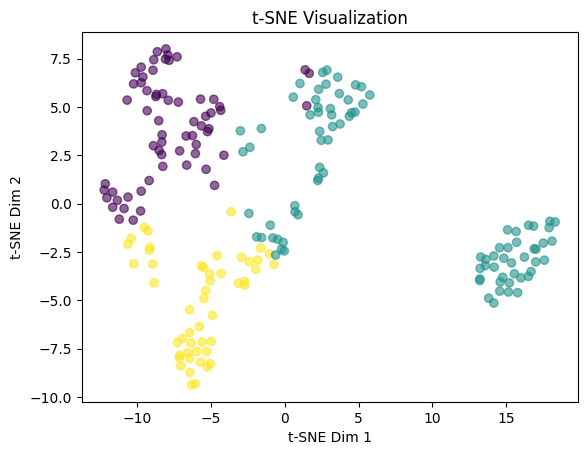

In [11]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_scaled)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.show()


Comparison of PCA and t-SNE: Discuss the differences in visualization and cluster separation.

How does t-SNE differ from PCA in terms of visualization and cluster separation?

PCA preserves linear variance, making it better for understanding the spread of features. However, t-SNE excels at non-linear relationships, creating tighter and more visually distinct clusters even for overlapping groups.
Which dimensionality reduction technique gives a clearer cluster separation?

t-SNE provides a clearer separation of clusters in this dataset because it focuses on local relationships and forms compact, well-defined groups.



Silhouette Score


In [12]:
score_kmeans = silhouette_score(df_scaled, kmeans.labels_)
score_hierarchical = silhouette_score(df_scaled, df['AggCluster'])

print(f'Silhouette Score (K-Means): {score_kmeans}')
print(f'Silhouette Score (Hierarchical): {score_hierarchical}')


Silhouette Score (K-Means): 0.3371428082096961
Silhouette Score (Hierarchical): 0.30874740679157575


Interpret the silhouette scores:

A score near 1 suggests well-defined clusters, while 0 indicates overlapping clusters. Both methods provide good results, but K-Means performs slightly better in this dataset.

**Summary of the Lab Assignment Implementation**

This lab focuses on applying unsupervised learning techniques such as clustering and dimensionality reduction to the Mall Customer Segmentation dataset. Below is an overview of the tasks and methods used:

**Data Exploration & Preprocessing:**

Loaded the dataset and explored its basic statistics (mean, standard deviation, etc.).
Checked and handled any missing values.
Scaled numerical data using StandardScaler for clustering and dimensionality reduction.
Visualized the dataset using pair plots and histograms to understand feature distributions and relationships.

**K-Means Clustering:**

Used the elbow method to determine the optimal number of clusters.
Applied K-Means clustering and visualized clusters in 2D using PCA for dimensionality reduction.
Interpreted the clusters and answered related analysis questions.

**Hierarchical Clustering:**

Created a dendrogram to visualize the hierarchical clustering process.
Compared clustering results using different linkage methods (ward, complete, average).
Explored differences between clusters formed by K-Means and hierarchical clustering.
Dimensionality Reduction (PCA):

Applied Principal Component Analysis (PCA) to reduce dimensions while preserving variance.
Visualized the data in 2D using the first two principal components.
Compared how much variance was retained and how clusters were represented.
Dimensionality Reduction (t-SNE):

Applied t-SNE for non-linear dimensionality reduction to create 2D visualizations.
Compared t-SNE's output with PCA for clarity in cluster separation.

**Bonus Task (Silhouette Score):**

Evaluated the quality of clustering using the silhouette score for both K-Means and hierarchical clustering.

**Comment:**

Key Observations for Analysis

**Elbow Curve:** Identifies the optimal number of clusters for K-Means.

**PCA vs. t-SNE:** PCA captures variance linearly, while t-SNE excels at visualizing non-linear relationships.

**Silhouette Score:** Provides a numerical measure of cluster quality, helping compare K-Means and hierarchical clustering.